In [ ]:
# Data handling libraries
import pandas as pd
import numpy as np

# For preprocessing and splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For deep learning with TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# For model evaluation and visualization
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# For PyTorch (extra credit)
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
import pandas as pd

# Load the NYC Yellow Taxi trip data (Parquet file)
taxi_data = pd.read_parquet('/content/yellow_tripdata_2020-01.parquet')

# Load the weather data (Excel file)
weather_data = pd.read_excel('/content/export.xlsx')

# Preview the first few rows of each dataset to inspect the data
print("Taxi Data Preview:")
print(taxi_data.head())

print("\nWeather Data Preview:")
print(weather_data.head())


Taxi Data Preview:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4         2  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amoun

In [ ]:
# Convert the 'tpep_pickup_datetime' in taxi data to datetime
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])

# Convert the 'date' in weather data to datetime
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Check the conversion
print(taxi_data['tpep_pickup_datetime'].head())
print(weather_data['date'].head())


0   2020-01-01 00:28:15
1   2020-01-01 00:35:39
2   2020-01-01 00:47:41
3   2020-01-01 00:55:23
4   2020-01-01 00:01:58
Name: tpep_pickup_datetime, dtype: datetime64[us]
0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-04
4   2020-01-05
Name: date, dtype: datetime64[ns]


In [ ]:
# Convert 'pickup_date' to datetime format (date type)
taxi_data['pickup_date'] = pd.to_datetime(taxi_data['pickup_date'])

# Merge the datasets on the 'pickup_date' and 'date' columns
merged_data = pd.merge(taxi_data, weather_data, left_on='pickup_date', right_on='date', how='left')

# Check the merged data
print(merged_data.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4         2  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  ...  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pr

In [ ]:
# Check for missing values in the merged data
print(merged_data.isnull().sum())

# Option 1: Drop rows with missing values
# merged_data = merged_data.dropna()

# Option 2: Fill missing values (e.g., forward fill)
merged_data.fillna(method='ffill', inplace=True)

# Check after handling missing values
print(merged_data.isnull().sum())


VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            65441
trip_distance                  0
RatecodeID                 65441
store_and_fwd_flag         65441
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       65441
airport_fee              6405008
pickup_date                    0
date                         212
tavg                      209422
tmin                      606440
tmax                      606440
prcp                     6405008
snow                     6405008
wdir                     6405008
wspd                      209422
wpgt                     6405008
pres                      209422
tsun      

/tmp/ipython-input-3463318938.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
airport_fee              6405008
pickup_date                    0
date                           0
tavg                           0
tmin                           0
tmax                           0
prcp                     6405008
snow                     6405008
wdir                     6405008
wspd                           0
wpgt                     6405008
pres                           0
tsun      

In [ ]:
# Drop columns with too many missing values (e.g., more than 90% missing)
merged_data = merged_data.drop(columns=['airport_fee', 'prcp', 'snow', 'wdir', 'wpgt', 'tsun'])

# Check the remaining missing values
print(merged_data.isnull().sum())


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
date                     0
tavg                     0
tmin                     0
tmax                     0
wspd                     0
pres                     0
dtype: int64


In [ ]:
# Impute missing values using forward fill for smaller missing proportions
merged_data.fillna(method='ffill', inplace=True)

# Alternatively, for numeric columns, we can impute with the median:
# merged_data['passenger_count'].fillna(merged_data['passenger_count'].median(), inplace=True)

# Check after filling missing values
print(merged_data.isnull().sum())


/tmp/ipython-input-1573894852.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
date                     0
tavg                     0
tmin                     0
tmax                     0
wspd                     0
pres                     0
dtype: int64


In [ ]:
# Extract hour and day of the week from the pickup datetime after merging
merged_data['pickup_hour'] = merged_data['tpep_pickup_datetime'].dt.hour
merged_data['pickup_day_of_week'] = merged_data['tpep_pickup_datetime'].dt.dayofweek

# List of numeric columns to scale, including the new features
numerical_columns = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount',
                     'pickup_hour', 'pickup_day_of_week', 'tavg', 'tmin', 'tmax']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])

# Check the scaled data
print(merged_data.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4         2  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0      -0.020799         1.0                  N           238           239   
1      -0.020799         1.0                  N           239           238   
2      -0.028014         1.0                  N           238           238   
3      -0.025609         1.0                  N           238           151   
4      -0.035229         1.0                  N           193           193   

   payment_type  ...  congestion_surcharge  pickup_date       date      ta

In [ ]:
# Define the target column (use the appropriate column)
target_column = 'total_amount'  # Replace with the actual target column (e.g., total_amount)

# Select features (X) and target (y)
X = merged_data.drop(columns=[target_column, 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_date', 'date'])
y = merged_data[target_column]

# Split the data into training (80%) and validation (20%) sets (time-sensitive split)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the size of the splits
print(f"Training data size: {len(X_train)}")
print(f"Validation data size: {len(X_val)}")


Training data size: 5124006
Validation data size: 1281002


In [ ]:
# Identify categorical columns in the dataset
categorical_columns = X.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")


Categorical columns: Index(['store_and_fwd_flag'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Check the data after encoding
print(X.head())


   VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
0         1              1.0      -0.020799         1.0                   0   
1         1              1.0      -0.020799         1.0                   0   
2         1              1.0      -0.028014         1.0                   0   
3         1              1.0      -0.025609         1.0                   0   
4         2              1.0      -0.035229         1.0                   0   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  ...  \
0           238           239             1    -0.551987    3.0  ...   
1           239           238             1    -0.469528    3.0  ...   
2           238           238             1    -0.551987    3.0  ...   
3           238           151             1    -0.593216    0.5  ...   
4           193           193             2    -0.758133    0.5  ...   

   tolls_amount  improvement_surcharge  congestion_surcharge      tavg  \
0           0.0   

In [ ]:
# Check if any columns in X_train have non-numeric data
print(X_train.dtypes)


VendorID                   int64
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
congestion_surcharge     float64
tavg                     float64
tmin                     float64
tmax                     float64
wspd                     float64
pres                     float64
pickup_hour              float64
pickup_day_of_week       float64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to any non-numeric columns in X_train and X_val
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_val[col] = label_encoder.transform(X_val[col])  # Use the same encoding for validation data

# Check the data types again to confirm all columns are numeric
print(X_train.dtypes)


VendorID                   int64
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag         int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
congestion_surcharge     float64
tavg                     float64
tmin                     float64
tmax                     float64
wspd                     float64
pres                     float64
pickup_hour              float64
pickup_day_of_week       float64
dtype: object


Epoch 1/10
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0013 - mae: 0.0266 - val_loss: 0.0014 - val_mae: 0.0221
Epoch 2/10
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0018 - mae: 0.0319 - val_loss: 0.0012 - val_mae: 0.0238
Epoch 3/10
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0016 - mae: 0.0303 - val_loss: 0.0019 - val_mae: 0.0383
Epoch 4/10
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0017 - mae: 0.0322 - val_loss: 0.0016 - val_mae: 0.0331
Epoch 5/10
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0018 - mae: 0.0321 - val_loss: 7.7117e-04 - val_mae: 0.0153
Epoch 6/10
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0017 - mae: 0.0320 - val_loss: 9.4978e-04 - val_mae: 0.0271
Epoch 7/10
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0017 - mae: 0.0311 - val_loss: 0.0042 - val_mae: 0.0595
Epoch 8/10
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0018 - mae: 0.0314 - val_loss: 0.0019 - val_mae: 0.0392
Epoch 9/10
5125/5125 ━━━━━━

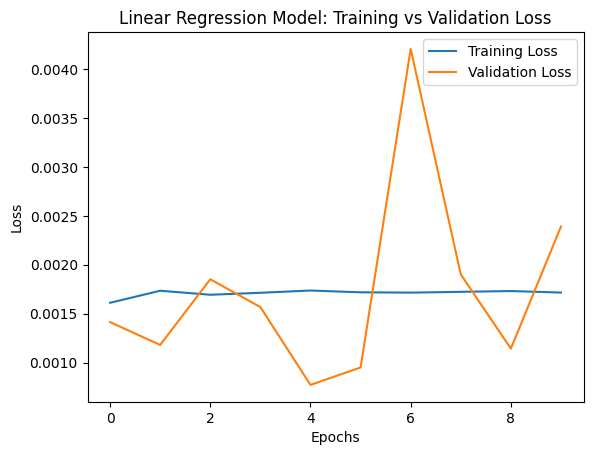

In [ ]:
# Train the Linear Regression model (after encoding categorical variables)
history_linear = model_linear.fit(X_train, y_train, epochs=10, batch_size=1000, validation_data=(X_val, y_val))

# Plot training vs validation loss
import matplotlib.pyplot as plt
plt.plot(history_linear.history['loss'], label='Training Loss')
plt.plot(history_linear.history['val_loss'], label='Validation Loss')
plt.title('Linear Regression Model: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 925.1096 - mae: 5.9783 - val_loss: 0.0295 - val_mae: 0.1211
Epoch 2/20
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0162 - mae: 0.0786 - val_loss: 0.0755 - val_mae: 0.0414
Epoch 3/20
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0939 - mae: 0.1958 - val_loss: 0.0275 - val_mae: 0.0266
Epoch 4/20
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0773 - mae: 0.1816 - val_loss: 0.2753 - val_mae: 0.1645
Epoch 5/20
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0770 - mae: 0.1776 - val_loss: 0.4346 - val_mae: 0.5360
Epoch 6/20
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0674 - mae: 0.1585 - val_loss: 0.1939 - val_mae: 0.0387
Epoch 7/20
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0638 - mae: 0.1646 - val_loss: 0.1719 - val_mae: 0.0854
Epoch 8/20
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0568 - mae: 0.1497 - val_loss: 0.1040 - val_mae: 0.1001
Epoch 9/20
5125/5125 ━━━━━━━━━

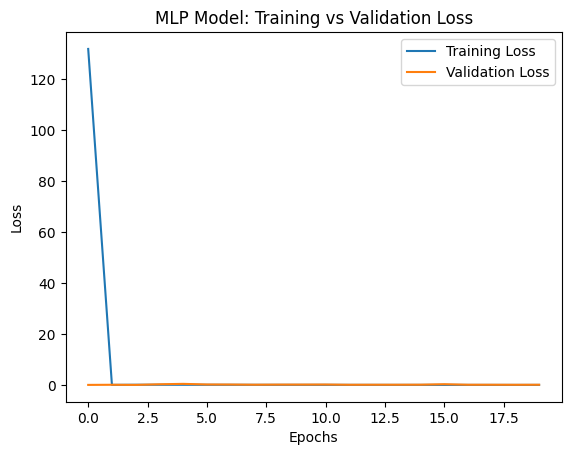

In [ ]:
# MLP Model (with one hidden layer)
model_mlp = Sequential()
model_mlp.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer
model_mlp.add(Dense(1))  # Output layer
model_mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_mlp = model_mlp.fit(X_train, y_train, epochs=20, batch_size=1000, validation_data=(X_val, y_val))

# Plot training vs validation loss
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.title('MLP Model: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 16.0545 - mae: 0.8782 - val_loss: 0.5923 - val_mae: 0.7614
Epoch 2/50
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.4806 - mae: 0.3430 - val_loss: 0.1400 - val_mae: 0.2207
Epoch 3/50
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.2016 - mae: 0.2634 - val_loss: 0.0922 - val_mae: 0.2563
Epoch 4/50
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.0804 - mae: 0.1833 - val_loss: 0.1384 - val_mae: 0.2220
Epoch 5/50
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.0419 - mae: 0.1496 - val_loss: 0.0277 - val_mae: 0.1105
Epoch 6/50
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.0219 - mae: 0.0999 - val_loss: 0.0161 - val_mae: 0.1118
Epoch 7/50
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.0170 - mae: 0.0803 - val_loss: 0.1964 - val_mae: 0.1095
Epoch 8/50
5125/5125 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.0114 - mae: 0.0576 - val_loss: 0.0316 - val_mae: 0.0207
Epoch 9/50
5125/5125 ━━━━━━━━━━

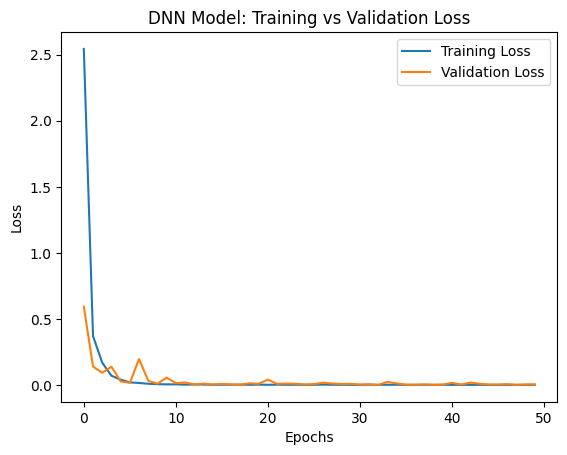

In [ ]:
# DNN Model (with two hidden layers)
model_dnn = Sequential()
model_dnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model_dnn.add(Dense(64, activation='relu'))  # Second hidden layer
model_dnn.add(Dense(1))  # Output layer
model_dnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_dnn = model_dnn.fit(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_val, y_val))

# Plot training vs validation loss
plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('DNN Model: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the models on the validation set
mse_linear, mae_linear = model_linear.evaluate(X_val, y_val)
mse_mlp, mae_mlp = model_mlp.evaluate(X_val, y_val)
mse_dnn, mae_dnn = model_dnn.evaluate(X_val, y_val)

# Print out the performance metrics for comparison
print(f"Linear Regression Model - MSE: {mse_linear}, MAE: {mae_linear}")
print(f"MLP Model - MSE: {mse_mlp}, MAE: {mae_mlp}")
print(f"DNN Model - MSE: {mse_dnn}, MAE: {mae_dnn}")


40032/40032 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step - loss: 7.3974e-04 - mae: 0.0234
40032/40032 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - loss: 0.0227 - mae: 0.1475
40032/40032 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step - loss: 4.9401e-04 - mae: 0.0133
Linear Regression Model - MSE: 0.0006097957375459373, MAE: 0.018361099064350128
MLP Model - MSE: 0.09201795607805252, MAE: 0.14361348748207092
DNN Model - MSE: 0.004688021261245012, MAE: 0.013385079801082611


40032/40032 ━━━━━━━━━━━━━━━━━━━━ 32s 797us/step


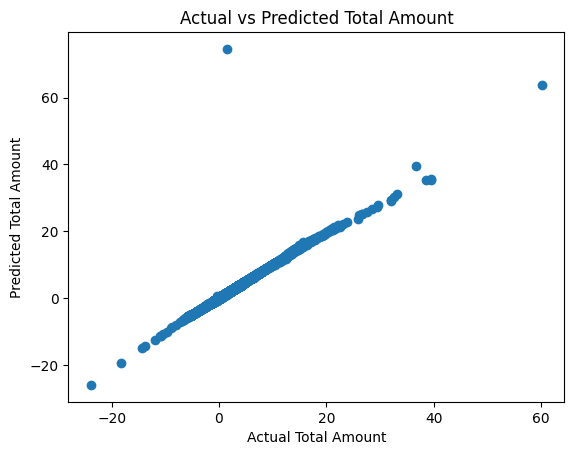

Predictions MSE: 0.004688023373183738
Predictions MAE: 0.013385098493167404


In [ ]:
# Assuming the best model is model_dnn (DNN)
predictions = model_dnn.predict(X_val)

# Compare the predictions with actual values
import matplotlib.pyplot as plt

plt.scatter(y_val, predictions)
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.title('Actual vs Predicted Total Amount')
plt.show()

# Calculate the loss (MSE or MAE) for the predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_val, predictions)
mae = mean_absolute_error(y_val, predictions)

print(f"Predictions MSE: {mse}")
print(f"Predictions MAE: {mae}")


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions from your model (example: using Random Forest)
y_pred = model.predict(X_val)  # Replace with your model's prediction

# Calculate the metrics
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"R²: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [ ]:
# Plot Residuals
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
# For Random Forest
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# For XGBoost, plot feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('XGBoost Feature Importance')
plt.show()
